In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
import sklearn.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# 0) preparing data

x_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(x_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
y = y.view(y.shape[0], 1)

# x.shape ==> x.shape[0] => number of samples, x.shape[1] => number of features
m, n_features = X.shape[0], X.shape[1]


In [70]:
# 1) model

in_features = n_features
out_features = 1
model = nn.Linear(in_features=in_features, out_features=out_features)

In [71]:
# 2) loss and optimizer

learning_rate = 0.05

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [72]:
# 3) train

n_epochs = 250

for epoch in range(n_epochs):
    # forward pass
    y_hat = model(X)
    
    # loss
    loss = criterion(y_hat, y)

    # backward
    loss.backward()
    # update weights
    optimizer.step()

    # zero
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f'epoch {epoch:3d}: loss = {loss.item()}')

epoch   0: loss = 5822.90869140625
epoch  10: loss = 1383.072509765625
epoch  20: loss = 537.45166015625
epoch  30: loss = 373.0053405761719
epoch  40: loss = 340.6064758300781
epoch  50: loss = 334.17266845703125
epoch  60: loss = 332.8888244628906
epoch  70: loss = 332.6319580078125
epoch  80: loss = 332.58050537109375
epoch  90: loss = 332.5701599121094
epoch 100: loss = 332.5680847167969
epoch 110: loss = 332.56768798828125
epoch 120: loss = 332.56756591796875
epoch 130: loss = 332.56756591796875
epoch 140: loss = 332.5675354003906
epoch 150: loss = 332.5675354003906
epoch 160: loss = 332.56756591796875
epoch 170: loss = 332.5675354003906
epoch 180: loss = 332.5675354003906
epoch 190: loss = 332.56756591796875
epoch 200: loss = 332.56756591796875
epoch 210: loss = 332.56756591796875
epoch 220: loss = 332.56756591796875
epoch 230: loss = 332.56756591796875
epoch 240: loss = 332.56756591796875


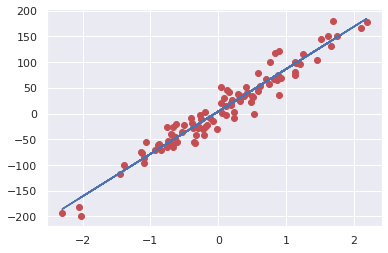

In [73]:
# plot
sns.set()
y_hat_plot = model(X).detach().numpy()
plt.plot(x_np, y_np, 'ro')
plt.plot(x_np, y_hat_plot)